In [1]:
"""
Author : Byunghyun Ban
Date : 2020.07.17.
"""
from tensorflow import keras

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import time
try:
    from matplotlib import pyplot as plt
except ModuleNotFoundError:
    import pip
    pip.main(['install', 'matplotlib'])
    try:
        from matplotlib import pyplot as plt
    except ModuleNotFoundError:
        time.sleep(2)
        from matplotlib import pyplot as plt

try:
    import numpy as np
except ModuleNotFoundError:
    import pip
    pip.main(['install', 'numpy'])
    try:
        import numpy as np
    except ModuleNotFoundError:
        time.sleep(2)
        import numpy as np


# 데이터를 떠먹여 줄 클래스를 제작합니다.
class DataReader:
    def __init__(self):
        self.label_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
        self.mnist = keras.datasets.mnist
        (train_X, self.train_Y), (test_X, self.test_Y) = self.mnist.load_data()

        self.train_X = np.asarray(train_X) / 255.0
        self.test_X = np.asarray(test_X) / 255.0

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def show_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label_names[self.train_Y[i]])
        plt.show()


def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")


11490434/11490434 [==============================] - 1s 0us/step


Data Read Done!
Training X Size : (60000, 28, 28)
Training Y Size : (60000,)
Test X Size : (10000, 28, 28)
Test Y Size : (10000,)




************ TRAINING START ************ 
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2587 - accuracy: 0.9265 - val_loss: 0.1431 - val_accuracy: 0.9593
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1121 - accuracy: 0.9674 - val_loss: 0.0990 - val_accuracy: 0.9686
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9770 - val_loss: 0.0810 - val_accuracy: 0.9743
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0799 - val_accuracy: 0.9743
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0748 - val_accuracy: 0.9770
Epoch 6/20
1875/1875 [===============

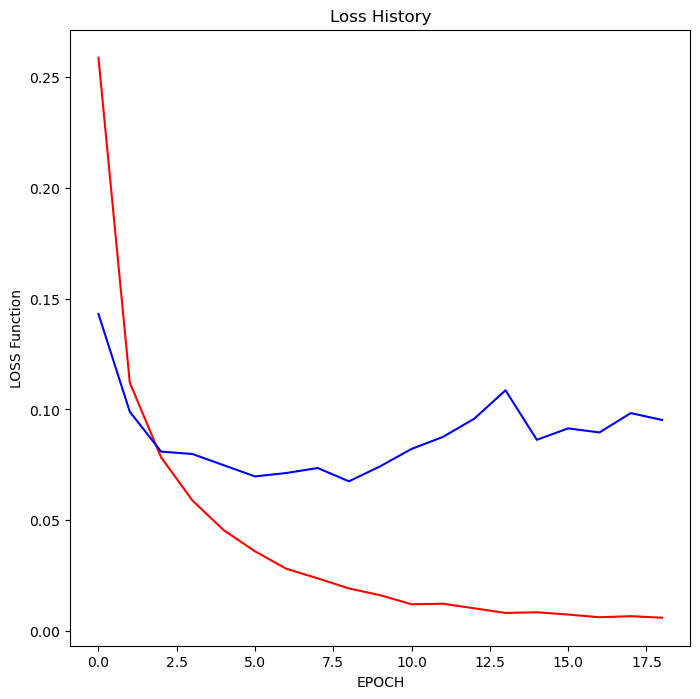

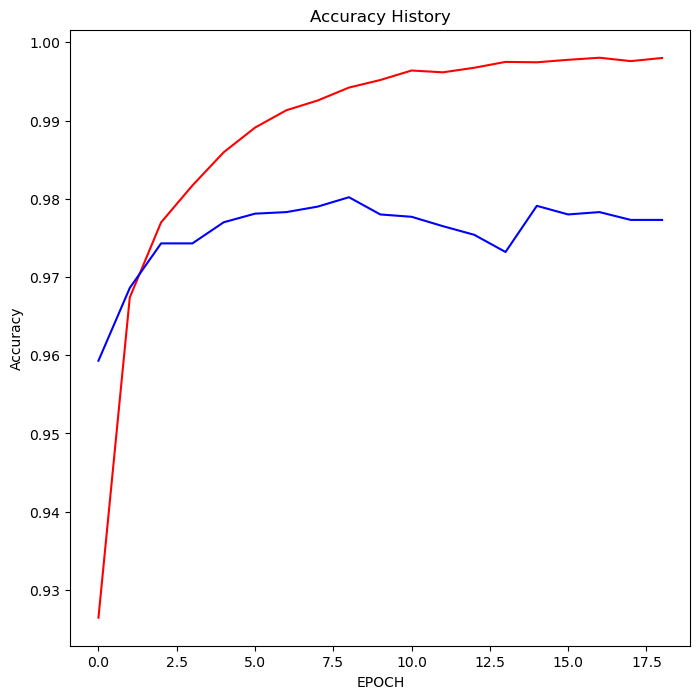

In [2]:
"""
Author : Byunghyun Ban
Date : 2020.07.24.
"""
from tensorflow import keras
import data_reader

# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 20  # 예제 기본값은 20입니다.

# 데이터를 읽어옵니다.
dr = data_reader.DataReader()

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
data_reader.draw_graph(history)


## 결과
- Loss
- 엄청나게 큰 overfitting이 일어난것을 확인할 수 있음.
- test loss가 증가하는것을 볼수있는데 초반에 최저점을 찍었다 == 더이상 학습을 진행할 필요 없다. 라는 뜻이다.
- 3~5 epoch에서 중단해도 괜찮은것이다.
-----
- Accuarcy
- Loss와 마찬가지로 overfitting이 큼.
- test는 Loss에서와 비슷하게 유지되다가 내려갔다가 내려가기 시작했던 지점과 비슷하게 올라감
- 이는 정확도에 대해서 계속 추론을 하다보니 낮은 신뢰도로 예측하기 시작했고 원래가지고있던 신뢰도가 퇴색되었다.라고 볼 수 있다.
- 다시 어느정도 올라갔다가 다시 떨어질것으로 예측된다